
---

---
# Preparação dos dados - exemplo 2

Este notebook mostra algumas técnicas de pré-processamento dos dados.

---

---







## Leitura dos dados

Este conjunto de dados é utilizado para predizer o valor de um imóvel com base nas suas características (atributos).

Fonte: https://www.kaggle.com/camnugent/california-housing-prices?select=housing.csv

A variável de destino (target) é o valor médio da casa (median_house_value) para os distritos da Califórnia.

Este conjunto de dados foi derivado do censo dos EUA de 1990.

- Número de Instâncias: 20640

- Número de Atributos: 8 atributos numéricos preditivos e o target

- Informações dos Atributos:
  - Longitude da quadra da casa (longitude)
  - Latitude da quadra da casa (latitude)
  - Idade média das casas na quadra (housing_median_age)
  - Total de salas na quadra (total_rooms)
  - Total de quartos na quadra (total_bedrooms)
  - População da quadra (population)
  - Número de famílias (households)
  - Renda média das famílias na quadra em dezenas de milhares de dólares (median_income)
  
- Informação do da variável de destino (median_house_value): 
   - cada valor corresponde ao valor médio da casa em unidades de 100.000 dólares

Obs: desconsidera-se o atributo categórico ocean_proximity

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Clone do repositório de dados do GitHub
!git clone https://github.com/malegopc/DSBD
# Leitura dos dados do arquivo .csv como dataframe 
housing = pd.read_csv("/content/DSBD/Datasets/California_housing/housing.csv")
# Mostra as 5 primeiras e 5 últimas linhas
housing

Cloning into 'DSBD'...
remote: Enumerating objects: 492, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 492 (delta 14), reused 0 (delta 0), pack-reused 457
Receiving objects: 100% (492/492), 8.59 MiB | 23.98 MiB/s, done.
Resolving deltas: 100% (222/222), done.


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


##Eliminação manual de variáveis

In [ ]:
 housing.drop(['ocean_proximity'], axis = 1 , inplace = True)
 housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


##Amostragem de dados

In [ ]:
amostra = housing.sample(n=3,random_state = 1) # amostra de tamanho n
amostra

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0


In [ ]:
amostra = housing.sample(frac=0.001,random_state=1) # fração dos dados
amostra

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0
6636,-118.16,34.15,17.0,821.0,163.0,229.0,164.0,7.3715,263000.0
17333,-120.44,34.91,12.0,3189.0,463.0,1200.0,442.0,5.2990,226800.0
19081,-122.48,38.31,29.0,2375.0,560.0,1124.0,502.0,2.3276,166200.0
13298,-117.64,34.08,35.0,1254.0,241.0,729.0,253.0,3.4950,118000.0
7157,-118.16,34.04,45.0,332.0,70.0,302.0,60.0,3.1895,156300.0


## Dados ausentes

Observe que o atributo "total_bedrooms" possui dados ausentes.

In [ ]:
# Mostra o número de dados non-null (não ausentes) e o tipo de cada atributo
print('Informações sobre os dados:\n')
housing.info()
# Soma o número de dados null (ausentes)
print('\n\nSoma de dados null (vazios):\n')
housing.isnull().sum()

Informações sobre os dados:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Soma de dados null (vazios):



longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

## Eliminação de instâncias com dados ausentes 

In [ ]:
# Exclui as instâncias (linhas) com dados ausentes:
housing.dropna(inplace = False)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


##Imputação de dados ausentes

Imputação de dados ausentes pela média da coluna

Manual:

In [ ]:
housing2 = housing.copy()
column_mean = housing2['total_bedrooms'].mean()
housing2['total_bedrooms'] = housing2['total_bedrooms'].fillna(value = column_mean)

In [ ]:
# Soma o número de dados null (ausentes)
print('\n\nSoma de dados null (vazios):\n')
housing2.isnull().sum()



Soma de dados null (vazios):



longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

SimpleImputer:

In [ ]:
from sklearn.impute import SimpleImputer

housing3 = housing.copy()
# strategy: mean, median, most_frequent, constant
imputer = SimpleImputer(missing_values = np.nan, strategy ='mean')
housing3[['total_bedrooms']] = imputer.fit_transform(housing3[['total_bedrooms']].values)

In [ ]:
# Soma o número de dados null (ausentes)
print('\n\nSoma de dados null (vazios):\n')
housing3.isnull().sum()



Soma de dados null (vazios):



longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

## Calcula a correlação entre pares de atributos (colunas)

In [ ]:
# Calcula a correlação entre pares de colunas
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


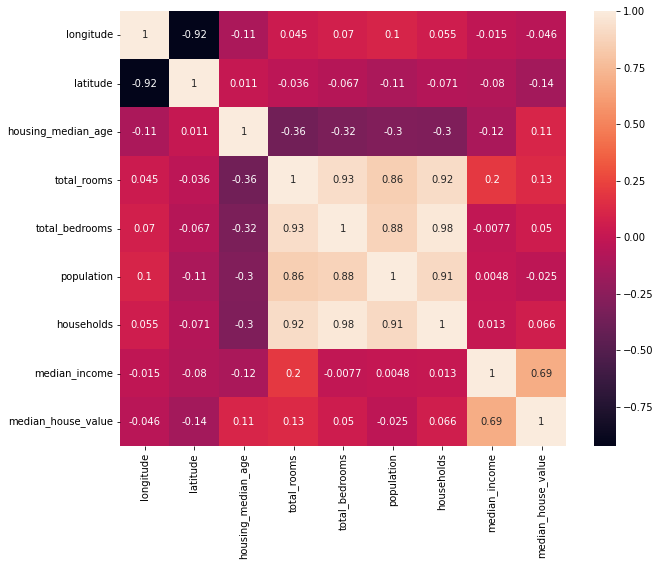

In [ ]:
# Mostra um mapa de calor dessas correlações
plt.figure(figsize=(10,8))
sns.heatmap(housing.corr(), annot=True)

## Salva os dados pré-processados em um arquivo .csv

In [ ]:
housing.to_csv('housing_out.csv')

# Separa atributos e variável de destino

Separa atributos (em X) e variável de destino (em y).

Divide por 100.000 dólares o valor das casas apenas para facilitar a visualização dos resultados.

In [ ]:
# Separa os atributos da variável de destino (median_house_value)
X = housing.drop('median_house_value',axis=1).values
y = housing['median_house_value'].values/100000 # divide por 100.000 dólares o valor das casas
print(X.shape)
print(y.shape)

(20640, 8)
(20640,)


## Divide o conjunto de dados em treino e teste

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15480, 8), (5160, 8), (15480,), (5160,))

## Normaliza (padroniza) os dados

Transforma os atributos redimensionando para o intervalo [0,1]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)